<IPython.core.display.Javascript object>


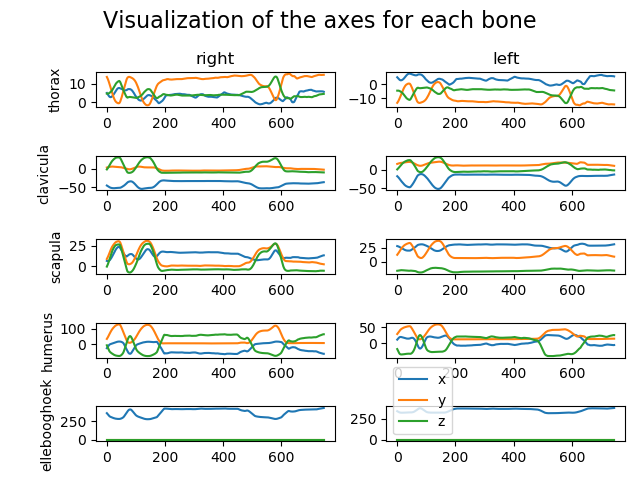

In [2]:
import pandas as pd
import numpy as np
%matplotlib notebook
import matplotlib.pyplot as plt
from optparse import OptionParser

labels = ["thorax_r_x", "thorax_r_y", "thorax_r_z",
          "clavicula_r_x", "clavicula_r_y", "clavicula_r_z",
          "scapula_r_x", "scapula_r_y", "scapula_r_z",
          "humerus_r_x", "humerus_r_y", "humerus_r_z",
          "ellebooghoek_r_x", "ellebooghoek_r_y", "ellebooghoek_r_z",
          "thorax_l_x", "thorax_l_y", "thorax_l_z",
          "clavicula_l_x", "clavicula_l_y", "clavicula_l_z",
          "scapula_l_x", "scapula_l_y", "scapula_l_z",
          "humerus_l_x", "humerus_l_y", "humerus_l_z",
          "ellebooghoek_l_x", "ellebooghoek_l_y", "ellebooghoek_l_z"]

axis_labels = ['x', 'y', 'z']

subplot_indexes = [
    1, 3, 5, 7, 9, 2, 4, 6, 8, 10
]


def get_body_part_index(index):
    return index / 3


def moving_average(a, n=3):
    ret = np.cumsum(a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n


# Script entry point
if __name__ == '__main__':
    parser = OptionParser()
    parser.add_option("-f", "--file", dest="filename",
                      help="use data inside the file.",
                      metavar="PATH_1,PATH_2")
    parser.add_option("--lift", dest="lift",
                      help="lift the data before process it.",
                      metavar="3")
    parser.add_option("-s", "--separator", dest="vertical_line",
                      help="X-axis value use to display vertical lines. Values are separate by a comma ','.",
                      metavar="0,140")
    parser.add_option("-l", "--limit", dest="limit",
                      help="X-axis limit.", metavar="200")

    # Parse args
    (options, args) = parser.parse_args()
    
    filenames = ['./data/file-with-multiple-exercises.csv']

    vertical_line = [0, 90, 90, 200, 470, 635]

    options.lift = 0
    
    if options.lift:
        options.lift = int(options.lift)

    if options.vertical_line:
        vertical_line = options.vertical_line.split(',')
        vertical_line = list(map(int, vertical_line))

    limit = 0
    if options.limit:
        limit = int(options.limit)

    for file_index in range(len(filenames)):

        # Read file
        file_data = pd.read_csv(filenames[file_index], header=None)

        # Set columns name
        file_data = file_data.rename(columns={index: k for index, k in enumerate(labels)})

        tmp_df = file_data
        if options.lift:
            tmp_df = pd.DataFrame()

            for bone in file_data:
                tmp_df[bone] = moving_average(np.array(file_data[bone]), options.lift)

            file_data = tmp_df

        fig = plt.figure(filenames[file_index])
        fig.suptitle('Visualization of the axes for each bone', fontsize=16)
        
        if not options.limit:
            row_count = 0
            # iterating over indices
            for col in file_data.index:
                row_count += 1
            limit = row_count

        for index, k in enumerate(labels):

            if int(get_body_part_index(index)) - get_body_part_index(index) != 0:
                continue

            # Create subplot
            ax = fig.add_subplot(5, 2, subplot_indexes[int(get_body_part_index(index))])

            # For each axis of the body part plot data
            for body_part_index in range(0, 3):
                ax.plot(file_data.index[: limit], file_data[labels[index + body_part_index]][: limit], label=axis_labels[body_part_index])

            for xc in vertical_line:
                ax.axvline(x=xc, c='r', linestyle=':')

            # Add label on the left of the graph
            if int(get_body_part_index(index)) < 5:
                ax.set_ylabel(k[:k.find('_')])
            # Add label on top of the graph
            if int(get_body_part_index(index)) == 0:
                ax.set_title('right')
            if int(get_body_part_index(index)) == 5:
                ax.set_title('left')

    plt.tight_layout()
    plt.subplots_adjust(left=0.15, top=0.85)
    plt.legend()
    plt.show()